In [ ]:
   #NEWS CLASSIFICATION ASSIGNMENT   
    #News Category 
    # A set Algorithmns to categories news based on their headlines
    #Import libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.rcParams['figure.figsize'] = (6,6)
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
print(os.listdir("../input"))


In [ ]:
 #Meta Information Of the Dataset
    #Data preparation
     #Data exploration and pre-processing 
     #Getting the data Head
    #Visualizing the First Five Data Record
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline
#working with Downloaded Dataset
#df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True) can also work
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.head()


In [ ]:
#Data preprocessing
#Getting the data tail,the last Datarecords
#df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True) can also work
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.tail()


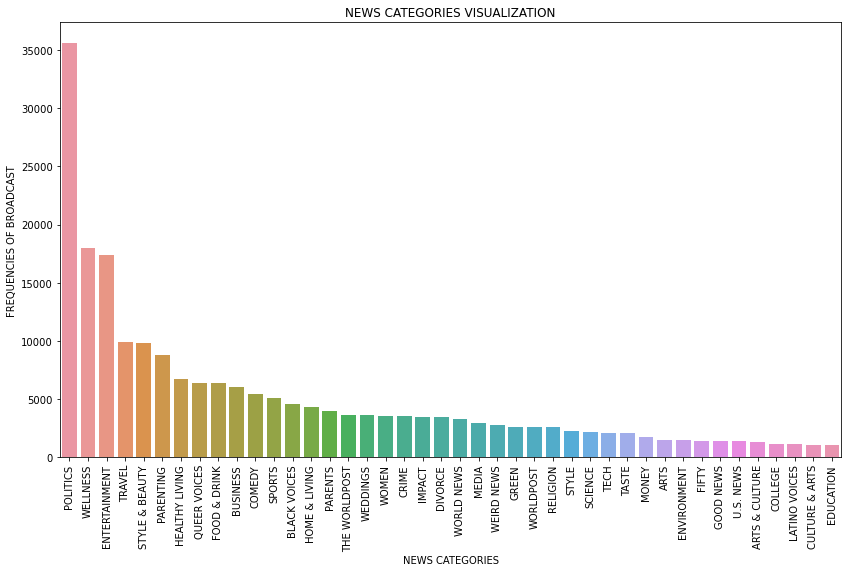

In [29]:
#Visualizing The News dataset in A graphical Model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.ylabel('FREQUENCIES OF BROADCAST')
plt.xlabel('NEWS CATEGORIES')
plt.title('NEWS CATEGORIES VISUALIZATION')
plt.xticks(rotation=90);

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


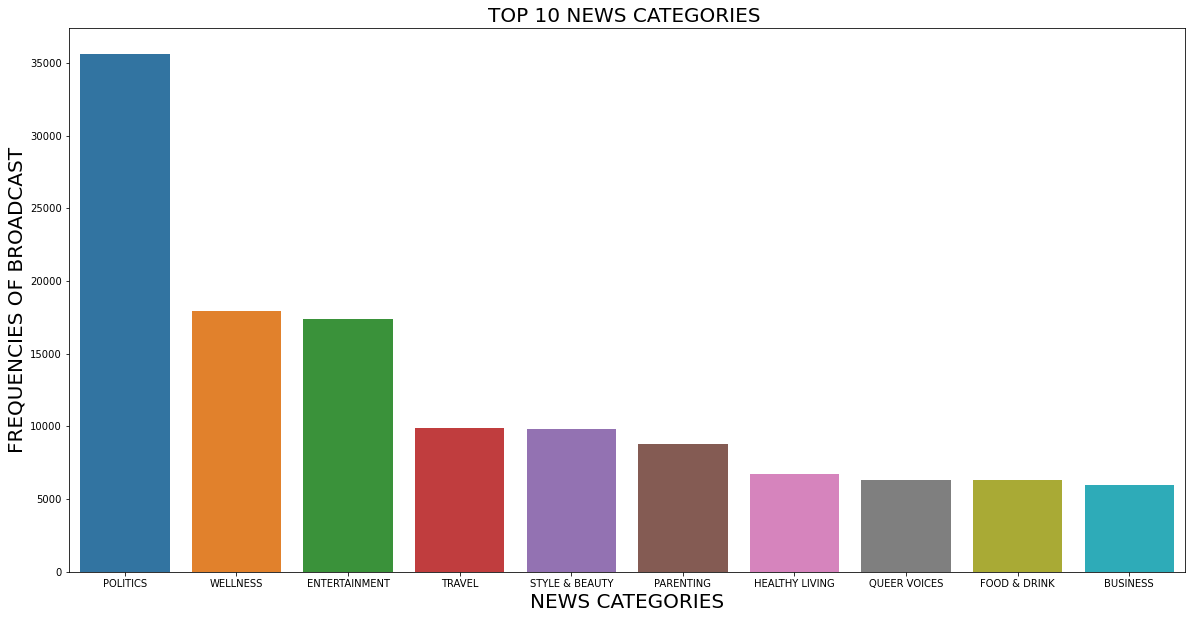

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
category_label = df.category.value_counts()[:10]
plt.figure(figsize=(20, 10))
sns.barplot(category_label.index, category_label)
plt.xlabel('NEWS CATEGORIES', fontsize=20)
plt.ylabel('FREQUENCIES OF BROADCAST', fontsize=20);
plt.title('TOP 10 NEWS CATEGORIES ', fontsize=20);

In [31]:
category_label_enc = {value: key for key, value in enumerate(df.category.unique())}
category_label_enc

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21,
 'BLACK VOICES': 22,
 'TRAVEL': 23,
 'MONEY': 24,
 'RELIGION': 25,
 'LATINO VOICES': 26,
 'IMPACT': 27,
 'WEDDINGS': 28,
 'COLLEGE': 29,
 'PARENTS': 30,
 'ARTS & CULTURE': 31,
 'STYLE': 32,
 'GREEN': 33,
 'TASTE': 34,
 'HEALTHY LIVING': 35,
 'THE WORLDPOST': 36,
 'GOOD NEWS': 37,
 'WORLDPOST': 38,
 'FIFTY': 39,
 'ARTS': 40,
 'DIVORCE': 41}

In [7]:
#Visualizing the Total News Groupings and getting the total number of each News set
Newscategory = df.groupby('category')
print("The Total News categories:", Newscategory .ngroups)
print(Newscategory .size())


The Total News categories: 42
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4583
BUSINESS           5992
COLLEGE            1144
COMEDY             5400
CRIME              3562
CULTURE & ARTS     1074
DIVORCE            3426
EDUCATION          1014
ENTERTAINMENT     17362
ENVIRONMENT        1444
FIFTY              1401
FOOD & DRINK       6340
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4320
IMPACT             3484
LATINO VOICES      1130
MEDIA              2944
MONEY              1756
PARENTING          8791
PARENTS            3955
POLITICS          35602
QUEER VOICES       6347
RELIGION           2577
SCIENCE            2206
SPORTS             5077
STYLE              2254
STYLE & BEAUTY     9814
TASTE              2096
TECH               2104
THE WORLDPOST      3664
TRAVEL             9900
U.S. NEWS          1377
WEDDINGS           3653
WEIRD NEWS         2777
WELLNESS          17945
WOMEN              3572
W

In [8]:
#Gives the Information of the Datset
#Provides the Memory Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [9]:
#Establishing if there is null Values in the dataset columns
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [34]:
#Establishing if there is any null Values in the whole dataset columns
df.isnull().sum().any()

False

In [49]:
#SelectS 5 topics of ('POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'SPORTS') and headline column
column_selected = 'headline' 
classes = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'SPORTS']
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df = df[[column_selected, 'category']]
df = df[df['category'].isin(classes)]
print('New shape: ' + str(df.shape))
display(df.head(5))

New shape: (85886, 2)


,headline,category
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS


In [53]:
display(df.tail(10))

,headline,category
209474,The Sleep Library: 11 Soothing Books For Bedtime,WELLNESS
209476,The Benefits of Caring for a Pet,WELLNESS
209478,Tea Time Beneath The Western Ghats (PHOTOS),TRAVEL
209479,This Is Only the Beginning: Surprising Advice ...,WELLNESS
209512,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT
209513,'Girl With the Dragon Tattoo' India Release Ca...,ENTERTAINMENT
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS
209526,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS


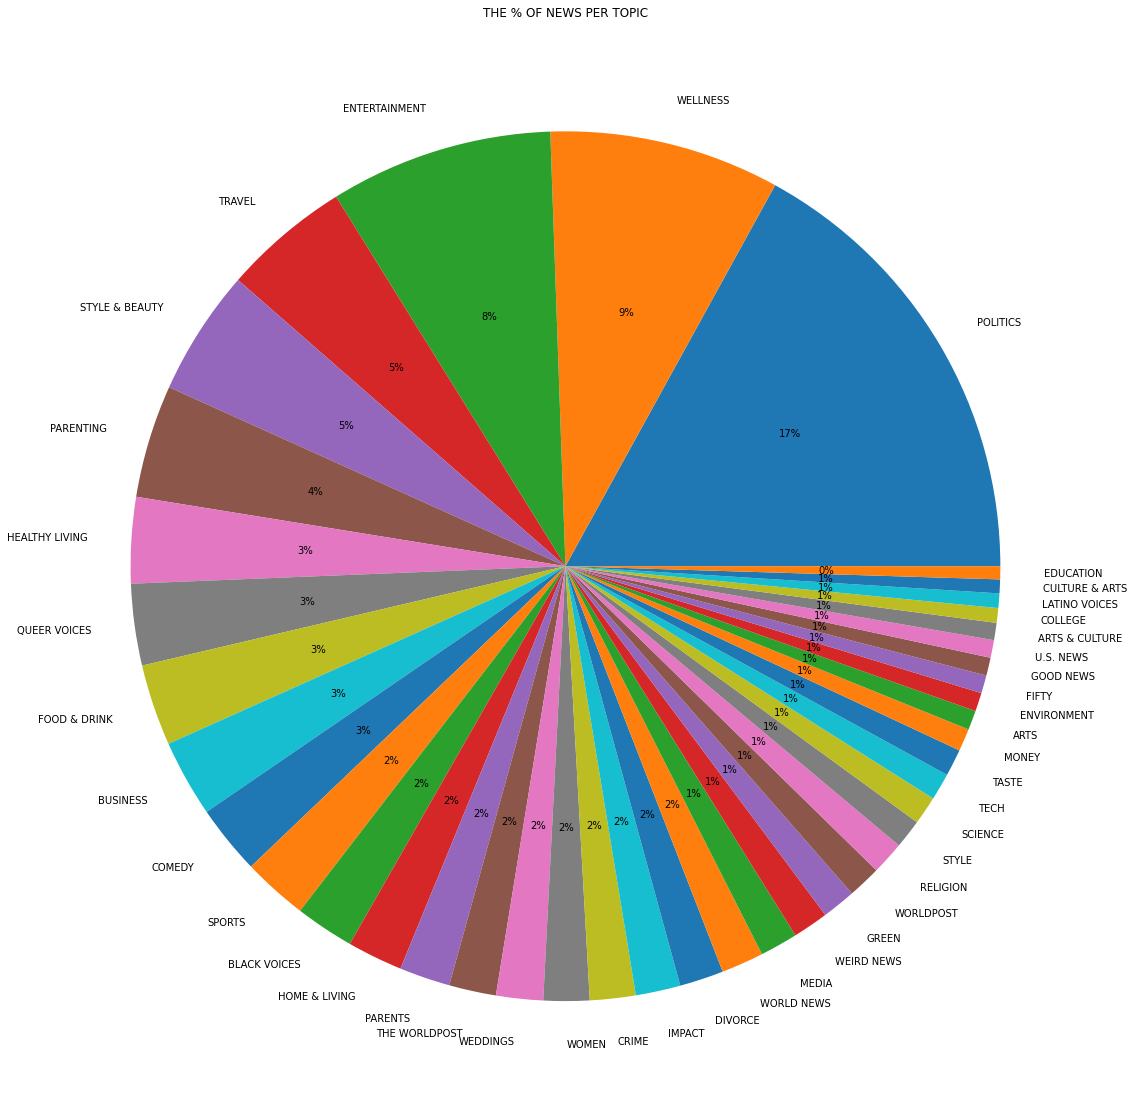

In [62]:
import matplotlib.pyplot as plt
plot = df.category.value_counts(normalize=True).plot.pie(autopct='%1.0f%%', 
                                                         figsize=(25, 20), 
                                                         title='THE % OF NEWS PER TOPIC', 
                                                         ylabel='')

In [54]:
#News categorized only based on the  Headlines,Category and Short Descriptions
#Filter the Dataset Columns to only remain with the Hadline,Category and Description
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date'],axis=1,inplace=True)

In [55]:
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [56]:
#News classifications Based only on the Category and Descriptions
import numpy as np 
import pandas as pd

df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date','headline'],axis=1,inplace=True)

In [40]:
df.head()

,category,short_description
0,U.S. NEWS,Health experts said it is too early to predict...
1,U.S. NEWS,He was subdued by passengers and crew when he ...
2,COMEDY,"""Until you have a dog you don't understand wha..."
3,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [41]:
df.tail()

,category,short_description
209522,TECH,Verizon Wireless and AT&T are already promotin...
209523,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,SPORTS,CORRECTION: An earlier version of this story i...
209526,SPORTS,The five-time all-star center tore into his te...


In [10]:
#Gives the News short_description in UPPERCASE
df['short_description'] = df['short_description'].str.upper()
import re
from bs4 import BeautifulSoup
for i in range (100,200):
    print(df['short_description'][i])
    print()

THE FINDING COMES AFTER THE BIDEN ADMINISTRATION CONFIRMED THAT THE RUSSIAN MILITARY IN AUGUST TOOK DELIVERY OF IRANIAN-MANUFACTURED DRONES FOR USE IN UKRAINE.

THE "AS IT WAS" SINGER SAID HE ALSO DOESN’T SEE MANY PARALLELS BETWEEN MUSIC AND ACTING.

JOCELYN BENSON SAID MISINFORMATION "FUELS THE POTENTIAL FOR ADDITIONAL THREATS, HARASSMENT AND EVEN VIOLENCE ON ELECTION DAY."

CLOUDFLARE CEO MATTHEW PRINCE HAD PREVIOUSLY RESISTED CALLS TO BLOCK THE SITE.

"HE'S WELCOME IN MY YARD AS LONG AS HE DOESN'T KILL ME OR MY FAMILY," THE HOMEOWNER QUIPPED.

WHEN ELSA AVILA LOOKS AT THE SCAR THAT RUNS DOWN HER TORSO, SHE CAN'T HELP REMEMBER MAY 24, WHEN A GUNMAN STORMED HER FOURTH GRADE WING AT ROBB ELEMENTARY IN UVALDE, TEXAS, KILLING 19 CHILDREN AND TWO TEACHERS AND LEAVING HER AND OTHERS WOUNDED.

TIM MICHELS CALLS ON SUPPORTERS TO GO AFTER MEDIA FOLLOWING MILWAUKEE JOURNAL SENTINEL STORY REPORTING MULTIMILLIONAIRE'S DONATIONS TO ANTI-ABORTION GROUPS.

POLICE IN TENNESSEE SAY AN ARREST HAS BEEN

In [19]:
#The function def removing_allshortforms(q) Removes any form of short form from the News Category dataset
import pandas as pd 
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
def removing_allshortforms(q):
    contractions = { 
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
     }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    return q

In [16]:
df['short_description'] = df['short_description'].apply(removing_allshortforms)

In [17]:
for i in range (100,200):
    print(df['short_description'][i])
    print()

The finding comes after the Biden administration confirmed that the Russian military in August took delivery of Iranian-manufactured drones for use in Ukraine.

The "As It Was" singer said he also doesn’t see many parallels between music and acting.

Jocelyn Benson said misinformation "fuels the potential for additional threats, harassment and even violence on Election Day."

Cloudflare CEO Matthew Prince had previously resisted calls to block the site.

"He's welcome in my yard as long as he does not kill me or my family," the homeowner quipped.

When Elsa Avila looks at the scar that runs down her torso, she can not help remember May 24, when a gunman stormed her fourth grade wing at Robb Elementary in Uvalde, Texas, killing 19 children and two teachers and leaving her and others wounded.

Tim Michels calls on supporters to go after media following Milwaukee Journal Sentinel story reporting multimillionaire's donations to anti-abortion groups.

Police in Tennessee say an arrest has b

In [6]:
import numpy as np
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
categories = df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['category'].apply(lambda x: category_int[x])
df.head()


,link,headline,category,short_description,authors,date,c2id
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,35
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,35
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,5
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,22
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,35


In [ ]:
           #DEEP LEARNING APPLICATIONS MODELS
#Author identification
#Question-answering
#Language detection
#Document classification
#Translation Tasks
#Articles lebelling
#Sentiment analysis
#The basic Work Flows to prepare text data for machine learning models are followed in such order: 
#Tokenization
#One-Hot encoding or word indexing
#Pad sequencing
#Embedding layer (Word2Vec)
#Corresponding word vector


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import pandas_profiling as pp
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!

In [ ]:
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.head()


In [ ]:
print("Unique categories:",df['category'].nunique())

In [ ]:
#(200853, 6)
#Unique categories: 41
#<class 'pandas.core.frame.DataFrame'>
#RangeIndex: 200853 entries, 0 to 200852
#Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
#---  ------             --------------   -----         
# 0   category           200853 non-null  object        
 #1   headline           200853 non-null  object        
 #2   authors            200853 non-null  object        
 #3   link               200853 non-null  object        
 #4   short_description  200853 non-null  object        
 #5   date               200853 non-null  datetime64[ns]
#dtypes: datetime64[ns](1), object(5)
#memory usage: 9.2+ MB

In [ ]:
df.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

In [75]:
#Gives the News Headlines in UPPERCASE

import numpy as np
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df['headline'] = df['headline'].str.lower()
import re
from bs4 import BeautifulSoup
for i in range (100,200):
    print(df['headline'][i])
    print()

u.s.: russia to buy rockets, artillery shells from north korea

harry styles say he feels like he has 'no idea what i'm doing' when acting

michigan secretary of state worried about ‘violence and disruption’ going into midterms

citing imminent danger cloudflare drops hate site kiwi farms

bear spotted chilling in california swimming pool

uvalde fourth graders waited an hour with wounded teacher

trump-endorsed wisconsin gubernatorial candidate tells voters to take up pitchforks

memphis police: arrest made in jogger's disappearance

fema director says it's ‘too early’ to tell when jackson will have clean water again

pakistan's largest natural lake is rising to dangerous levels due to monsoon

uvalde children grapple with trauma after school massacre

emergency declared as flash flooding hits northwest georgia

'the osbournes' will return in british revival on bbc: 'same laughter, love and tears'

plane that circled mississippi threatening to crash has landed

fuel leak ruins nasa's 

In [ ]:
#WordClouds


In [20]:
#The Function removes all the Punctuation from the News Authors Name

def Removes_Anypunctuations(p):
    pattern = re.compile('\W')
    p= re.sub(pattern, ' ', p).strip()
    return p
df['authors'] = df['authors'].apply(Removes_Anypunctuations)
for i in range (110,120):
    print(df['authors'][i])
    print()

Acacia Coronado and Adriana Gomez Licon  AP



Marco Margaritoff



Marcia Dunn  AP

Terry Wallace  AP

Ben Blanchet

Marita Vlachou



Jim Heintz and Vladimir Isachenkov  AP



In [63]:
#Performs Word count
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
word_lens = df[column_selected].str.split(" ").str.len()
display(word_lens.describe().round(2))

count    209527.00
mean          9.60
std           3.07
min           1.00
25%           8.00
50%          10.00
75%          12.00
max          65.00
Name: headline, dtype: float64

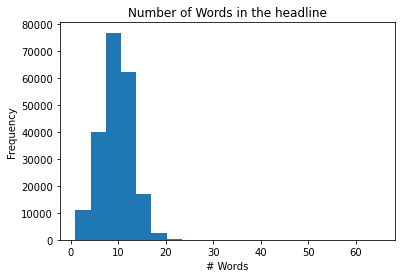

In [64]:
ax = word_lens.plot.hist(bins=20, title='Number of Words in the ' + column_selected)
plot = ax.set_xlabel("# Words")

In [ ]:
# minimum lenght of news in each category
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
lenmin_df = df.groupby('category')['short_description'].min().reset_index().sort_values(by='short_description',ascending=False)
lenmin_df.head()

In [ ]:
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
lenmax_df = df.groupby('category')['short_description'].max().reset_index().sort_values(by='short_description',ascending=False)
lenmax_df.head()

In [ ]:
#THE END THANK YOU

In [ ]:
print("helllo every body")